# Diferencialinės lygtys P4

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc

# Sprendinių skaičiavimo ir braižymo komandų enkapsuliavimas

Pirma kuriame Python'o funkciją krypčių lauko generavimui ar braižymui. 
Esminis klausimas: kokie turėtų būti funkcijos argumentai ir grąžinami rezultatai?

Čia apsiriboju krypčių lauko masyvo generavimu. 
Kadangi dvimačių masyvų X2, Y2 reikės ir braižymui su "plt.quiver()", jie bus sudaromi funkcijos išorėje, ir panaudoti kaip šios funkcijos argumentai.

Būtų galima braižyti ir krypčių lauką be rodyklių, tik reikėtų tada arba suroganizuoti duomenų struktūrą krypčių lauko atkarpoms, arba braižyti procedūroje (turbūt naudojantis pilna "figure/axis" braižymo metodika).

In [4]:
def KrypciuLaukas(F, X2, Y2):
    FY = F(X2,Y2)
    FX = 1/np.sqrt(FY**2 + 1)
    FY = FY*FX
    return (FX,FY)

Dabar galime trumpinti duomenų paruošimą krypčių lauko braižymui.

In [5]:
xa,xb = -3,3
ya,yb = -2,4
N = 20

In [6]:
X = np.linspace(xa,xb,N)
Y = np.linspace(ya,yb,N)
X2,Y2 = np.meshgrid(X,Y)

Dabar nudojame mūsų sudarytą funkciją. Jos pirmasis argumentas yra funkcija $F(x,y)$, 
kuri apibrėžia diferencialinę lygtį $y'=F(x,y)$. Ją užduodame kompaktiška-anonimiška "lambda" forma; žr. https://docs.python.org/3/tutorial/controlflow.html?highlight=lambda#lambda-expressions 

In [7]:
GX,GY = KrypciuLaukas( lambda x,y: y-x**2, X2, Y2)

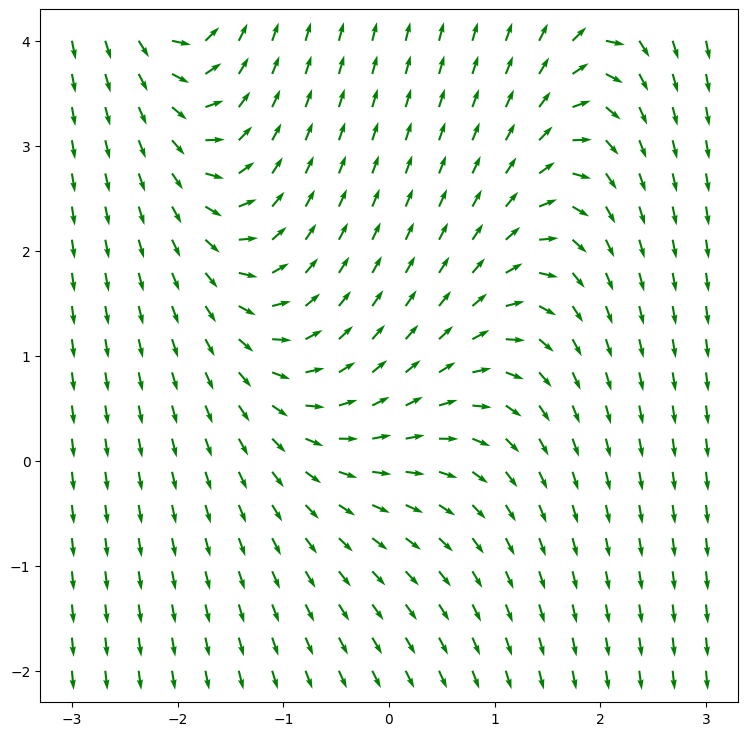

In [8]:
plt.figure( figsize=(9,9))
plt.quiver( X2, Y2, GX, GY, color="green")
plt.show()

Kadangi $F(x,y)$ naudosime dažniau, apibrėžiame kintamąjį šiai funkcijai. Tai alternatyva bendram funkcijos apibrėžimui su "def".

In [9]:
F = lambda x,y: y-x**2
F

<function __main__.<lambda>(x, y)>

Alternatyvus kodas to paties krypčių lauko braižymui (žemiau). 
Vietoj GX, GY tiesiogiai naudojame mūsų funkcijos iškvietimą. 
Tam, kad "išpakuoti" dvejopą funkcijos rezultato FX, FY seką (angl., *tuple*; liet., *kortežą*), naudojame žvaigždutės operatorių. Žr. 
* https://ffff.lt/py/tutorial/datastructures.html?highlight=tuple
* https://note.nkmk.me/en/python-tuple-list-unpack/, 
* https://runestone.academy/runestone/books/published/fopp/Tuples/UnpackingArgumentsToFunctions.html

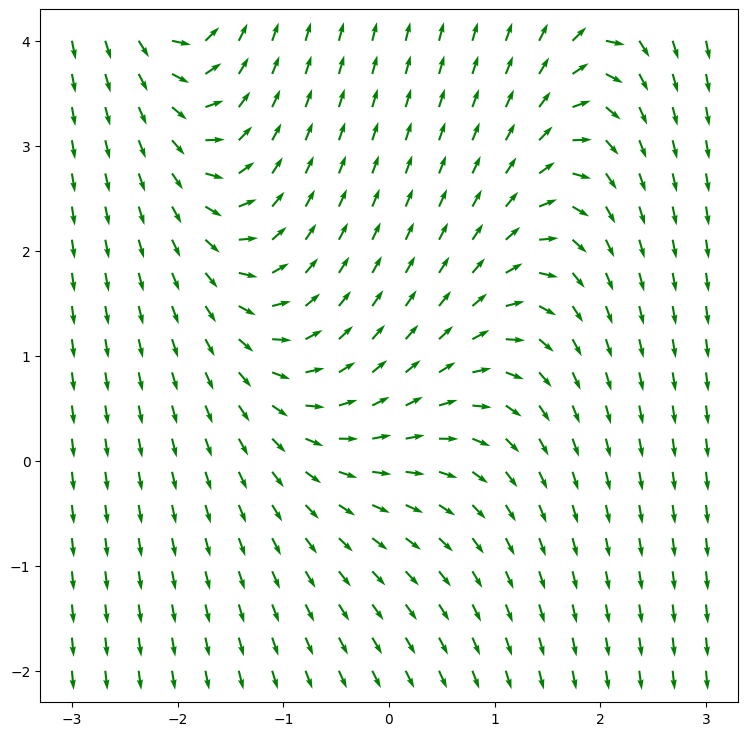

In [10]:
plt.figure( figsize=(9,9))
plt.quiver( X2, Y2, *KrypciuLaukas(F,X2,Y2), color="green")
plt.show()

Dabar apibrėžiame Python'o funkciją diferencialinės lygties Koši uždavinio (apytikrio) sprendinio skaitmeniniam skaičiavimui Oilerio tiesioginiu metodu. Vietoje praeitos paskaitos kintamojo "h" skaičiuojame (galimai skirtingus) skirtumus tarp gretimų $x$-koordinatinių reikšmių.

Pasirinkti argumentai yra: 
* funkcija $F(x,y)$; 
* pradinės sąlygos $y(x_0)=y_0$ duomenys, 
* ir (preliminarus) $x$-koordinatinis masyvas. 

In [11]:
def KosiProblema(F, x0, y0, x):
    N = x.size-1
    N0 = round(N*(x0-x[0])/(x[-1]-x[0]))
    x = x + (x0-x[N0])     # dideliems N tai nesvarbus patikslinimas
    y = np.zeros(N+1)
    y[N0] = y0
    for k in range(N0,N):
        y[k+1] = y[k]+(x[k+1]-x[k])*F(x[k],y[k])
    for k in range(N0,0,-1):
        y[k-1] = y[k]-(x[k]-x[k-1])*F(x[k],y[k])
    return (x,y)     # paskaitos metu buvo tik "return y", ignoruojant x modifikaciją

Dabar galime apibrėžti $x$-koordinatinį masyvą, ir patogiai braižyti kelias integralines kreives.

In [12]:
N = 50
x = np.linspace(xa,xb,N+1)

Su žvaigždutės operatoriumi, mūsų funkcijų iškvietimai generuoja iš karto du argumentus "plt" procedūroms.  

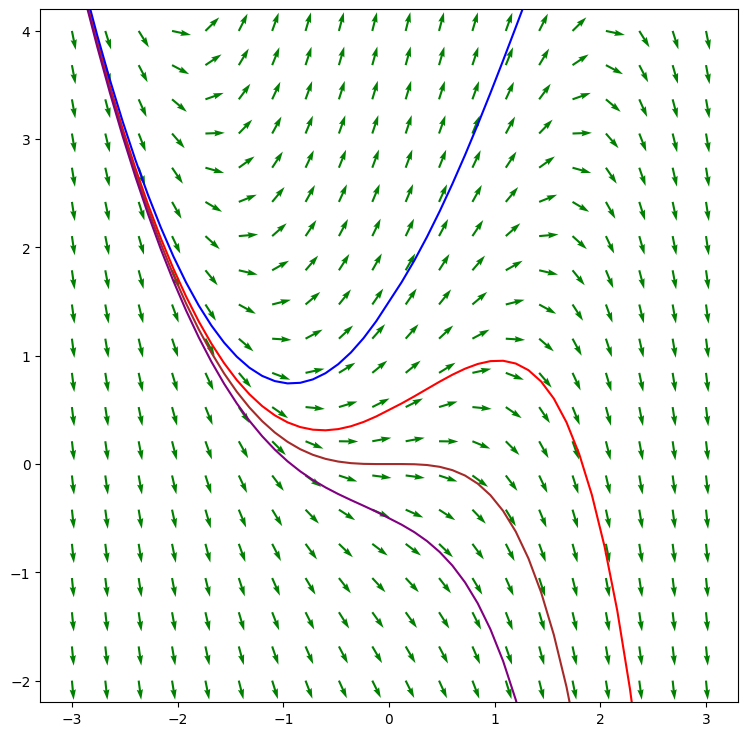

In [13]:
plt.figure( figsize=(9,9))
plt.quiver( X2, Y2, *KrypciuLaukas(F,X2,Y2), color="green")
plt.plot( *KosiProblema(F,0,1/2,x), color="red")
plt.plot( *KosiProblema(F,0,3/2,x), color="blue")
plt.plot( *KosiProblema(F,0,0,x), color="brown")
plt.plot( *KosiProblema(F,0,-1/2,x), color="purple")
plt.ylim([ya-0.2,yb+0.2])
plt.show()

Galime naudoti tikslesnius skaičiavimus su Scipy, ir pakeisti funkciją "KosiProblema" šia (tikėtinai tikslesne) funkcija "CauchyProblem"

In [14]:
def CauchyProblem(F, x0, y0, x):
    N = x.size-1
    N0 = round(N*(x0-x[0])/(x[-1]-x[0]))
    x = x + (x0-x[N0])
    y = np.zeros(N+1)
    y[N0] = y0
    yp = sc.odeint(F, y0, x[N0:])
    yn = sc.odeint(F, y0, x[N0::-1])
    y = np.concatenate( ( yn.flatten()[:0:-1], yp.flatten() ) )
    return (x,y)  

Nepamirštame, kad paketui Scipy turime apibrėžti diferencialinės lygties funkciją $F(x,y)$ su argumentais atvrikštine tvarka: FF(y,x).

In [15]:
FF = lambda y,x: y-x**2

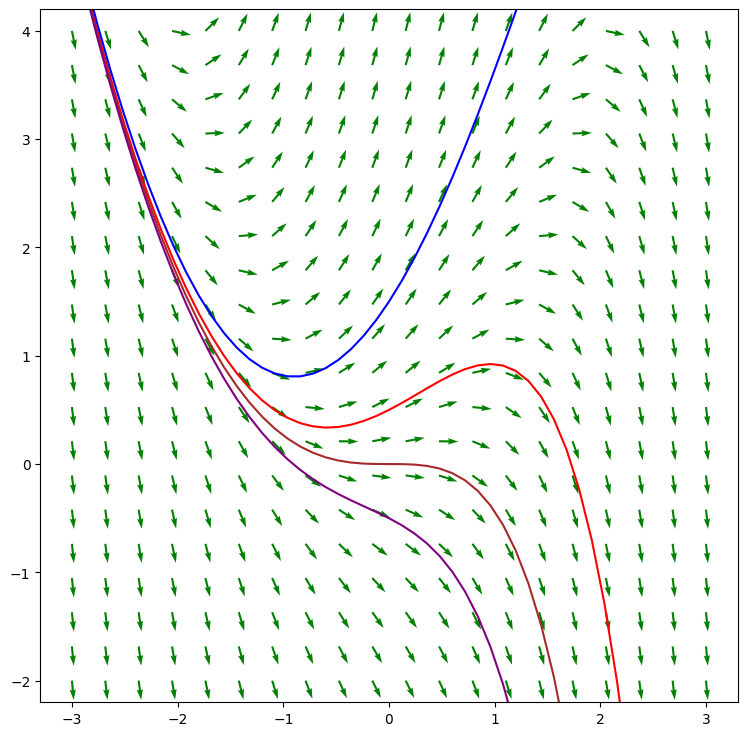

In [16]:
plt.figure( figsize=(9,9))
plt.quiver( X2, Y2, *KrypciuLaukas(F,X2,Y2), color="green")
plt.plot( *CauchyProblem(FF,0,1/2,x), color="red")
plt.plot( *CauchyProblem(FF,0,3/2,x), color="blue")
plt.plot( *CauchyProblem(FF,0,0,x), color="brown")
plt.plot( *CauchyProblem(FF,0,-1/2,x), color="purple")
plt.ylim([ya-0.2,yb+0.2])
plt.show()

Atkreipkite dėmesį, kad nagrinėjama lygtis $y'=y-x^2$ yra tiesinė.

Jei supainiojame Scipy argumentus ir (iš tiesų) nagrinėjame netiesinę lygtį $y'=x-y^2$, gauname Python'o perspėjimus ir neaiškius grafikus su Scipy.

C:\Users\liuda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


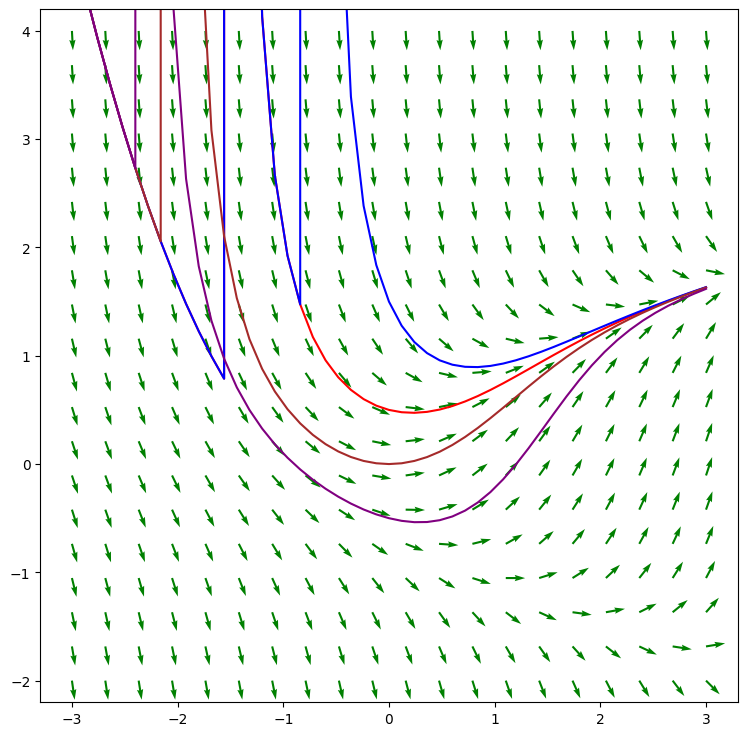

In [17]:
plt.figure( figsize=(9,9))
plt.quiver( X2, Y2, *KrypciuLaukas(FF,X2,Y2), color="green")
plt.plot( *CauchyProblem(F,0,1/2,x), color="red")
plt.plot( *CauchyProblem(F,0,3/2,x), color="blue")
plt.plot( *CauchyProblem(F,0,0,x), color="brown")
plt.plot( *CauchyProblem(F,0,-1/2,x), color="purple")
plt.ylim([ya-0.2,yb+0.2])
plt.show()

Su naivesne funckija "KosiProblema" geriau matyti, kad sprendinių grafikai pakyla į begalybę dar baigtinėms neigiamoms $x$-reikšmėms. Tokį sprendinių pobūdį reikėtų automatiškai pastebėti, atitinkamai mažinti sprendinių apibrėžimo sritį (tad ir $x$-koordinatinį masyvą), išvengti Python'o klaidų ar perspėjimų pranešimų.

C:\Users\liuda\AppData\Local\Temp\ipykernel_40524\4162920429.py:1: RuntimeWarning: overflow encountered in scalar power
  FF = lambda y,x: y-x**2


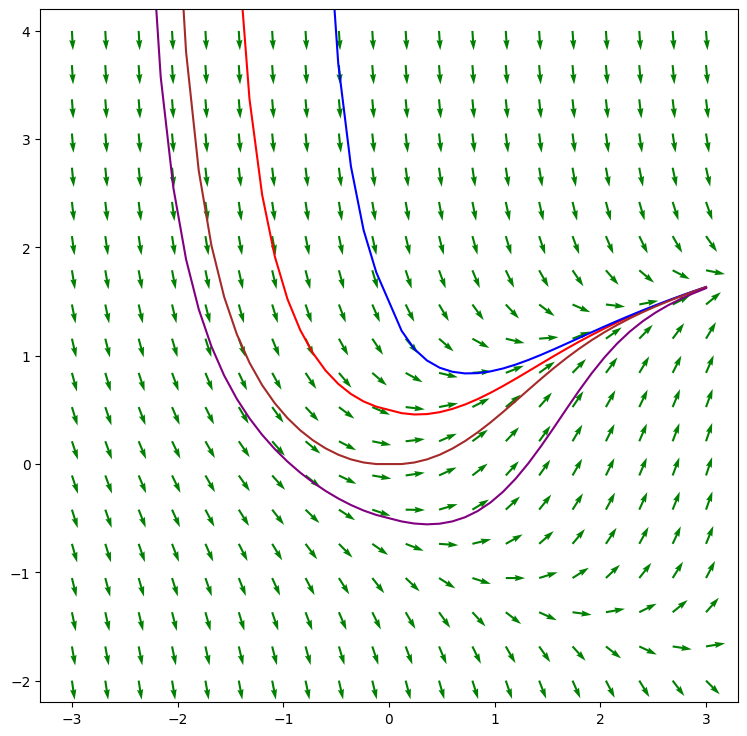

In [18]:
plt.figure( figsize=(9,9))
plt.quiver( X2, Y2, *KrypciuLaukas(FF,X2,Y2), color="green")
plt.plot( *KosiProblema(FF,0,1/2,x), color="red")
plt.plot( *KosiProblema(FF,0,3/2,x), color="blue")
plt.plot( *KosiProblema(FF,0,0,x), color="brown")
plt.plot( *KosiProblema(FF,0,-1/2,x), color="purple")
plt.ylim([ya-0.2,yb+0.2])
plt.show()

# Užduotis

Diferencialų lygties $P(x,y)dx+Q(x,y)dy=0$ krypčių laukas yra apibrėžiamas liestinių $P(\tilde{x},\tilde{y})(x-\tilde{x})+Q(\tilde{x},\tilde{y})(y-\tilde{x})$ kryptinėmis atkarpomis (ar vektoriais) įvairiuose taškuose $(\tilde{x},\tilde{y})$. Diferencialų lygties krypčių laukui prasmingos yra ir vertikalios kryptys. Diferencialų lygtyje lengviau išvengti singuliarumų ar kitų neapibrėžtumų.

Parašykite Python'u procedūrą diferencialų lygties, užduotomis funkcijomis $P(x,y)$ ir $Q(x,y)$, krypties lauko braižymui. Patikrinkite, ar iš tikrųjų nebraižote ortogonalaus lauko $\big(P(x,y),Q(x,y)\big)$.

In [19]:
def drawDiffField(P,Q, Kx=0,Ky=0): # Here P and Q are two-dimensional functions
    xa,xb = -3,3
    ya,yb = -2,4
    N = 20


    Xwave = np.linspace(xa,xb,N)
    Ywave = np.linspace(ya,yb,N)
    X2,Y2 = np.meshgrid(Xwave,Ywave)


    VectorX = P(X2,Y2)
    VectorY = Q(X2,Y2)
    (VectorX,VectorY) = normalizeVecotrsInField(VectorX,VectorY)

    
    plt.figure( figsize=(9,9))
    # plt.plot(X2, Y2, 'o', color='black')
    plt.quiver( X2, Y2, VectorY, -VectorX, color="green")
    plt.quiver( X2, Y2, VectorX, VectorY, color="green")
    plt.plot( *CauchyProblem(lambda y,x: -1*P(x,y)/Q(x,y),Kx,Ky,x), color="red")
    plt.ylim([ya-0.2,yb+0.2])

    
    
def normalizeVecotrsInField(Xcomp,Ycomp):
    return (Xcomp/np.sqrt(Xcomp**2 + Ycomp**2), Ycomp/np.sqrt(Xcomp**2 + Ycomp**2))

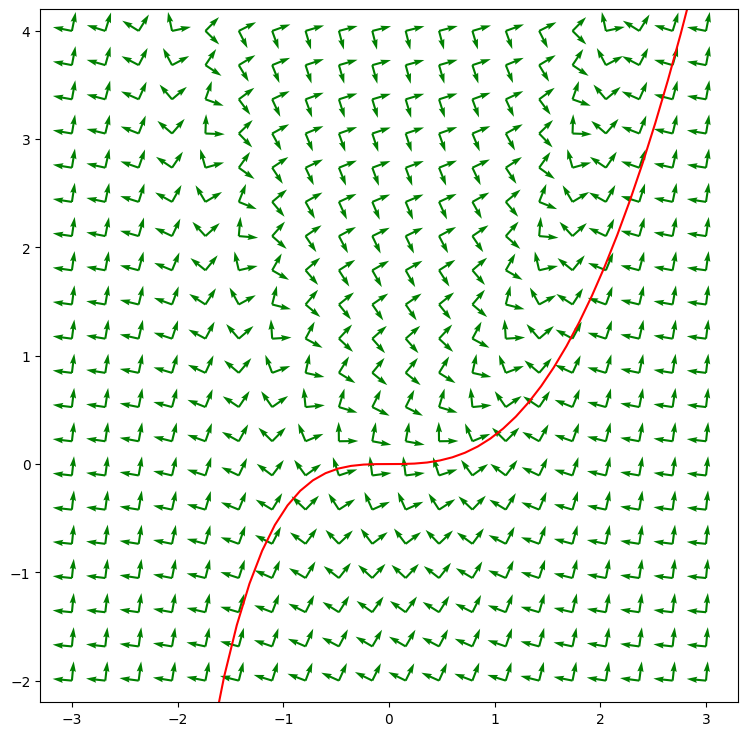

In [20]:
drawDiffField( lambda x,y: y-x**2, lambda x,y: 1)

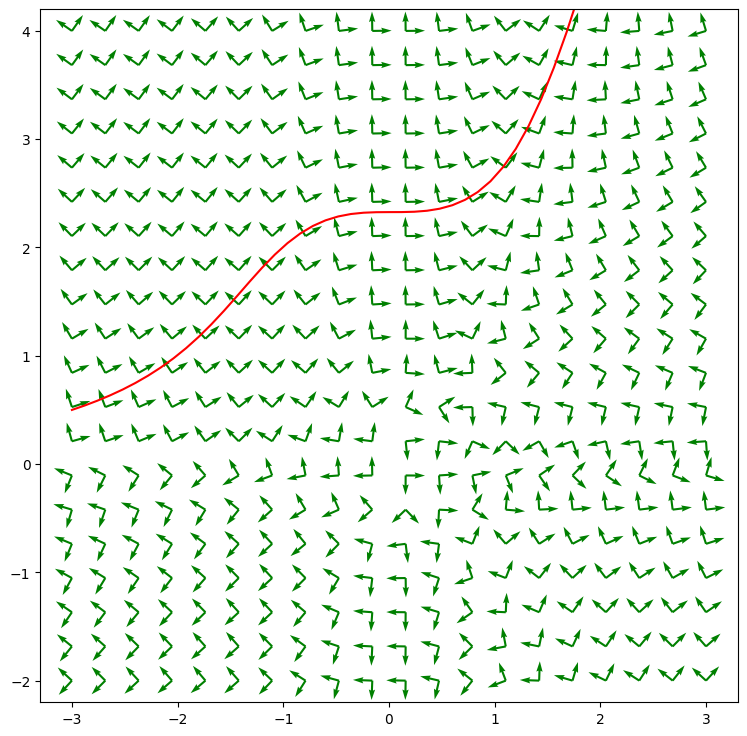

In [21]:
drawDiffField(lambda x,y: (2-9*x*y**2)*x, lambda x,y: (4*y**2-6*x**3)*y, -3, 0.5)

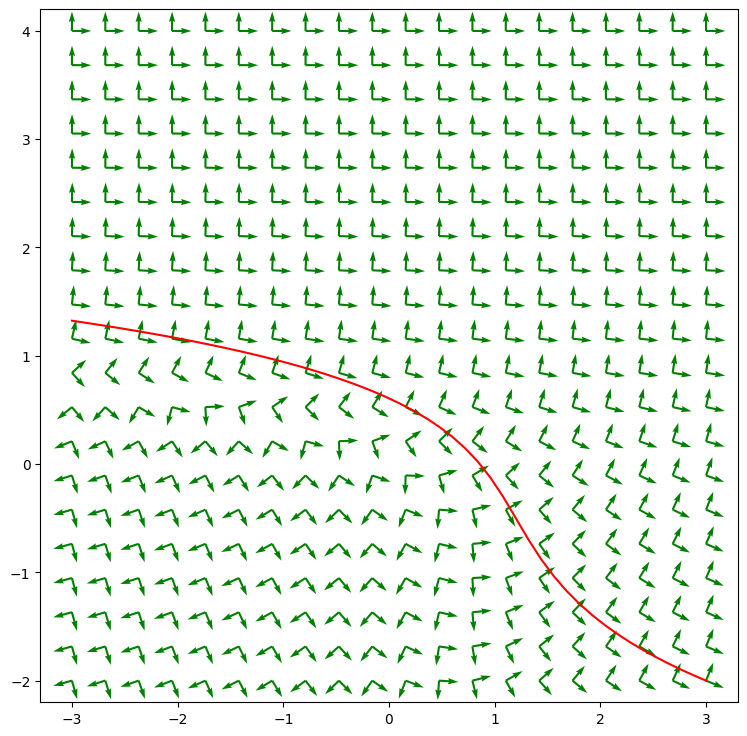

In [22]:
drawDiffField(lambda x,y: np.exp(-1*y), lambda x,y: 2*y +x*np.exp(-1*y), 3, -2)